In [70]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
file = "prev_disease_cdc.csv"
file_df = pd.read_csv(file)
file_df["disease"].unique()
ca_df = file_df.loc[file_df["county"]=="California"]
file_df["disease"].unique()
ca_df.head()

,disease,county,year,count
85,Diphtheria,California,2001,0
86,Diphtheria,California,2002,1
87,Diphtheria,California,2003,0
88,Diphtheria,California,2004,0
89,Diphtheria,California,2005,0


In [72]:
for disease in file_df["disease"].unique():
    print(disease)

Diphtheria
Hepatitis A
Hepatitis B, Acute
Hepatitis C, Acute
Invasive Meningococcal Disease
Measles
Mumps
Pertussis
Rubella
Tetanus
Varicella Hospitalizations


In [73]:
file2 = "total_births.csv"
file2_df =  pd.read_csv(file2)
file2_df.head()

ca_live_births = file2_df.loc[file2_df["Location"]=="California"]
ca_live_births = ca_live_births[["TimeFrame", "Data"]]
ca_live_births = ca_live_births.sort_values(by="TimeFrame", ascending=True)
ca_live_births.head()

#find population of 19-36 months in given year.
#finding pop
pop_df = ca_live_births.loc[ca_live_births["TimeFrame"] >= 1998]
pop_df = pop_df.loc[pop_df["TimeFrame"]<=2015]
pop_df["Data"] = pd.to_numeric(pop_df["Data"])
pop_df["per100000"] = pop_df["Data"]/100000
pop_df["halfpop"] = pop_df["Data"]/2
pop_df.head()

test_series = [0]
for year in pop_df["TimeFrame"]:
    local_halfpop = pop_df.loc[pop_df["TimeFrame"]==year,["halfpop"]]
    test_local = local_halfpop.iloc[0,0]
    test_series.append(test_local)
    
year_series = []
for year in pop_df["TimeFrame"]:
    local_halfpop = pop_df.loc[pop_df["TimeFrame"]==year,["TimeFrame"]]
    test_local = local_halfpop.iloc[0,0]
    year_series.append(test_local)

halfpop_df = pd.DataFrame(data=[year_series, test_series]).T
halfpop_df = halfpop_df.dropna()
halfpop_df = halfpop_df.astype(int)
haldpop_df = halfpop_df.columns=("TimeFrame", "prev_halfpop")
halfpop_df.head()

final_df = pd.merge(pop_df, halfpop_df)
final_df["18mo_births"] = final_df["Data"]+final_df["prev_halfpop"]
final_df["div100000"] = final_df["18mo_births"]/100000
final_df = final_df[["TimeFrame", "18mo_births", "div100000"]]
final_df["comp_year"] = final_df["TimeFrame"]+2

final_df = final_df[["comp_year", "div100000"]]
final_df

,comp_year,div100000
0,2000,5.21661
1,2001,7.79338
2,2002,7.91213
3,2003,7.93738
4,2004,7.93236
5,2005,8.05675
6,2006,8.15341
7,2007,8.21303
8,2008,8.36881
9,2009,8.47634


In [76]:
#making the california and measles specific dataframe
ca_df = file_df.loc[file_df["county"]=="California"]

per_hun_births = pd.DataFrame(final_df["div100000"])
full_df = pd.DataFrame(data = ca_df["year"].unique())
for disease in file_df["disease"].unique():
    local_df = ca_df.loc[ca_df["disease"]==disease, :]
    local_df = local_df[["year","count"]]
    full_df = pd.merge(full_df, local_df, left_on=0, right_on="year", how="outer")
    full_df = full_df.drop(columns=["year"])
    full_df = full_df.rename(columns={"count":disease})

full_df = full_df.rename(columns={0:"year"})
full_df
full_df = pd.merge(full_df, final_df, left_on="year", right_on="comp_year")
full_df

,year,Diphtheria,Hepatitis A,"Hepatitis B, Acute","Hepatitis C, Acute",Invasive Meningococcal Disease,Measles,Mumps,Pertussis,Rubella,Tetanus,Varicella Hospitalizations,comp_year,div100000
0,2001,0,NaN,NaN,NaN,309,40,NaN,644,NaN,10,NaN,2001,7.79338
1,2002,1,NaN,NaN,NaN,251,5,NaN,1309,NaN,8,NaN,2002,7.91213
2,2003,0,NaN,NaN,NaN,266,5,NaN,1009,NaN,5,NaN,2003,7.93738
3,2004,0,NaN,NaN,NaN,199,6,NaN,1130,NaN,6,NaN,2004,7.93236
4,2005,0,NaN,NaN,NaN,189,4,NaN,3184,NaN,7,NaN,2005,8.05675
5,2006,0,NaN,NaN,NaN,196,6,NaN,1658,NaN,11,NaN,2006,8.15341
6,2007,0,NaN,NaN,NaN,183,4,NaN,582,NaN,4,NaN,2007,8.21303
7,2008,0,NaN,NaN,NaN,196,17,NaN,527,NaN,4,NaN,2008,8.36881
8,2009,0,NaN,NaN,NaN,133,9,NaN,998,NaN,5,NaN,2009,8.47634
9,2010,0,NaN,NaN,NaN,121,27,29.0,9159,1.0,0,56.0,2010,8.34986


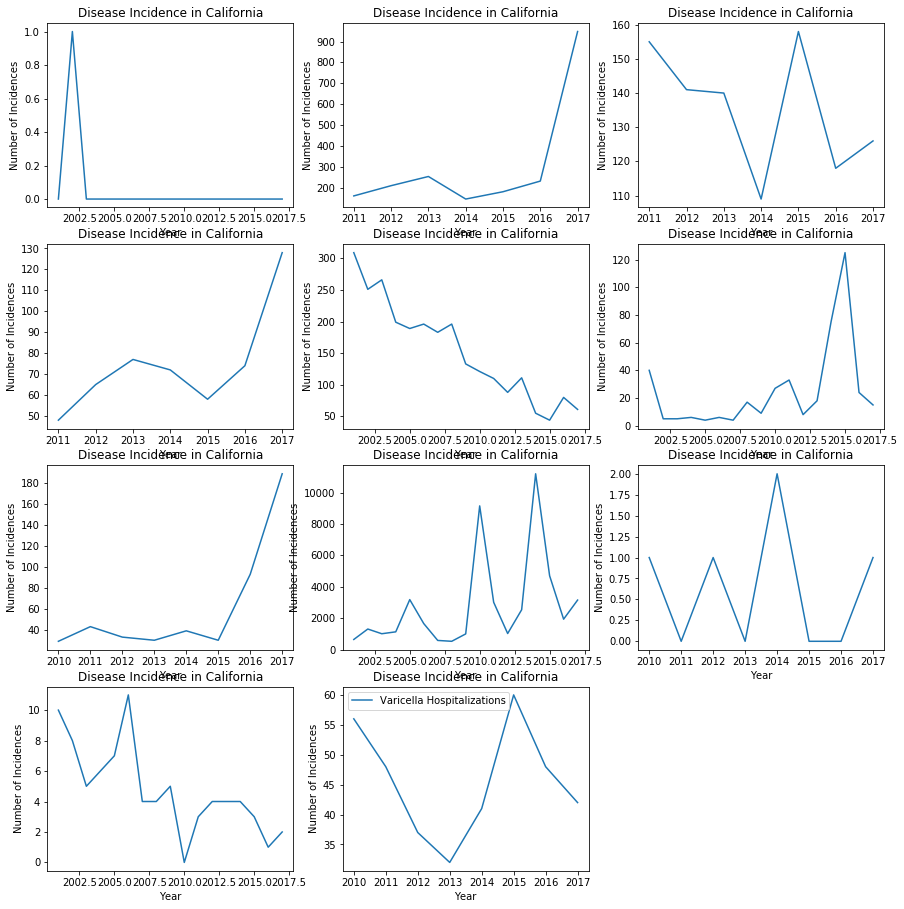

In [46]:
plt.figure(figsize=(15,40))
i=0
for disease in file_df["disease"].unique():
    i+=1
    plt.subplot(10, 3, i)
    plt.plot(full_df["year"], full_df[disease])
    plt.title("Disease Incidence in California")
    plt.xlabel("Year")
    plt.ylabel("Number of Incidences")
plt.legend()
plt.show()

In [11]:
final_df = pd.merge(ca_meas_df, final_df, left_on="year", right_on="comp_year")
final_df["Per100000"] = final_df["count"]/final_df["div100000"]
final_df.head()

NameError: name 'ca_meas_df' is not defined

In [ ]:
plt.figure(figsize=(13,8))
plt.plot(final_df["comp_year"], final_df["Per100000"])
plt.title("Measles Incidence in California")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.show()